In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

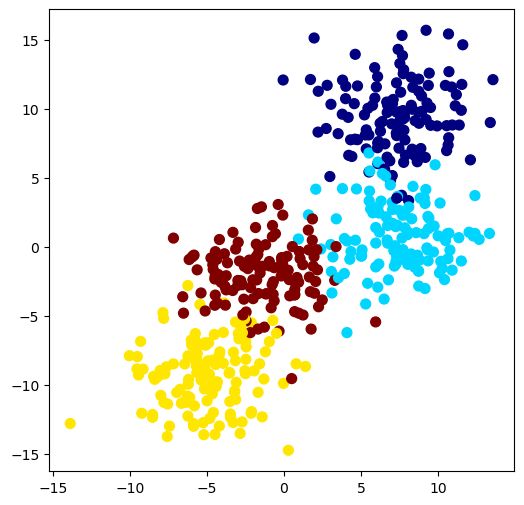

In [4]:
from sklearn.datasets import make_blobs

X,y = make_blobs(n_samples=500,centers=4,random_state=8,cluster_std=2.4)


plt.figure(figsize=(6,6))
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='jet')

In [5]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
def visualize_tree(classifier,X,y,boundaries=True,xlim=None,ylim=None):
    '''
    Visualizes a decision tree
    inputs: classifier model, X, y, optional x,y limits.
    outputs: meshgrid visualization for boundaries of the decision tree
    '''
    # fit the X and y data to the tree
    classifier.fit(X,y)
    
    # automatically set the x and y limits to the data (+/- 0.1)
    if xlim is None:
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    else:
        x_min, x_max = xlim

    if ylim is None:
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    else:
        y_min, y_max = ylim

    # create a mesh grid
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
    
    # define the Z by the predictions (this will color the mesh grid)
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Reshape based on meshgrid
    Z = Z.reshape(xx.shape)
    
    # plot the figure (use)
    plt.figure(figsize=(10,10))
    plt.pcolormesh(xx,yy,Z,alpha=0.2,cmap='jet')
    
    # plot the training points
    plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='jet')
    
    # set limits
    plt.xlim(x_min,x_max)
    plt.ylim(y_min,y_max)
    
    def plot_boundaries(i,xlim,ylim):
        
        if i < 0:
            return
        
        # shorter variable name
        tree = classifier.tree_
        
        # recursively go through nodes of the tree to plot boundaries
        if tree.feature[i] == 0:
            plt.plot([tree.threshold[i], tree.threshold[i]], ylim, '-k')
            plot_boundaries(tree.children_left[i],
                           [xlim[0], tree.threshold[i]], ylim)
            plot_boundaries(tree.children_right[i],
                           [tree.threshold[i], xlim[1]], ylim)
            
        elif tree.feature[i] == 1:
            plt.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-k')
            plot_boundaries(tree.children_left[i], xlim,
                           [ylim[0], tree.threshold[i]])
            plot_boundaries(tree.children_right[i], xlim,
                           [tree.threshold[i], ylim[1]])
            
    # random forest vs. single tree
    if boundaries:
        plot_boundaries(0, plt.xlim(),plt.ylim())

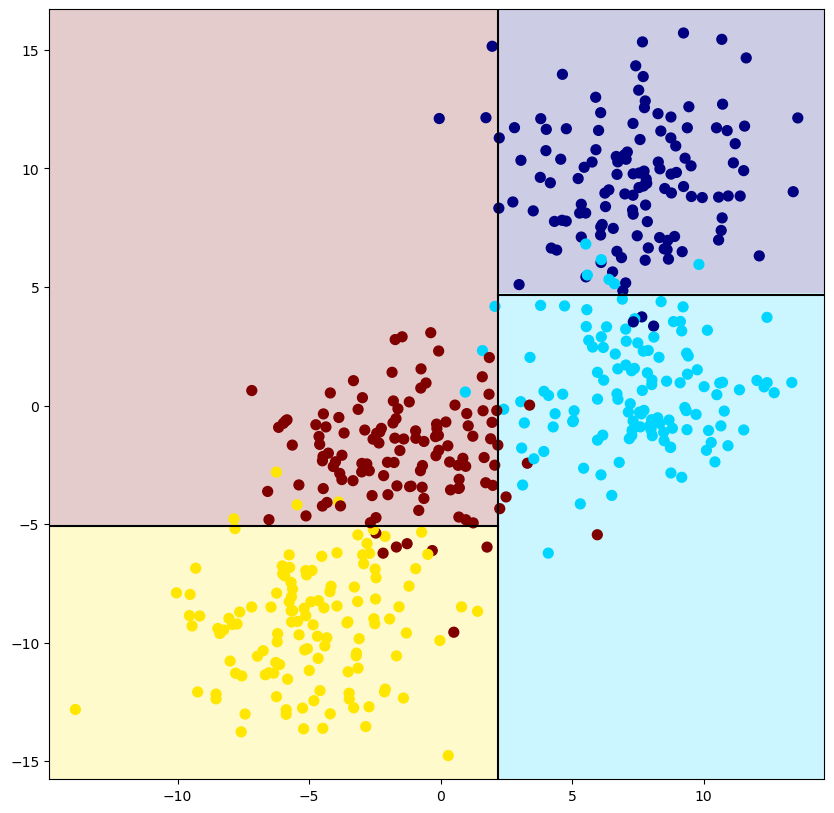

In [11]:
clf = DecisionTreeClassifier(max_depth=2,random_state=0)

visualize_tree(clf,X,y)

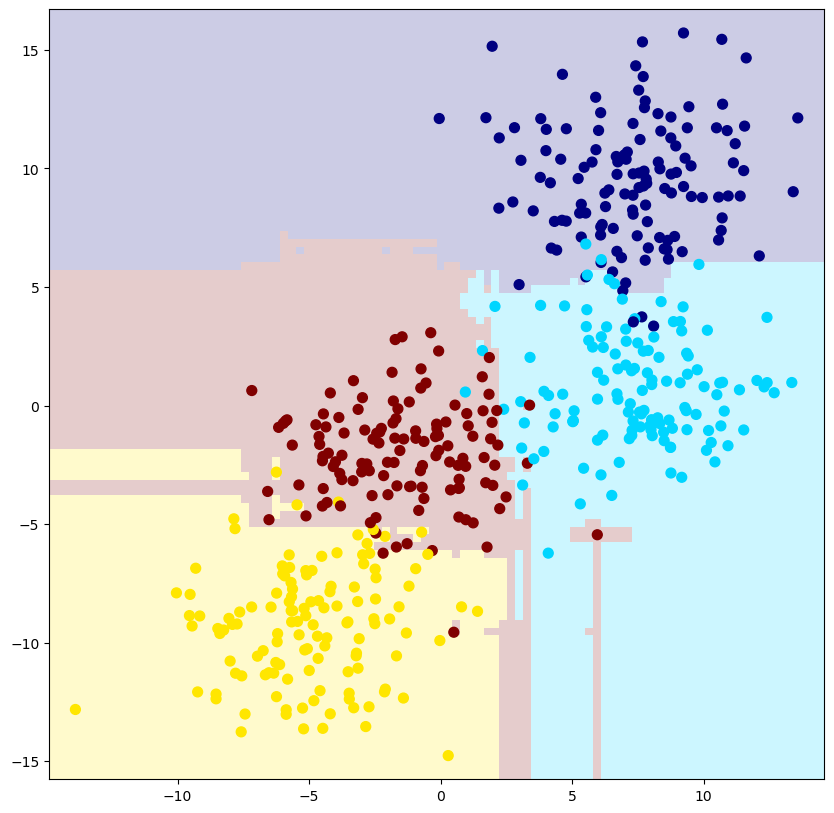

In [13]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100,random_state=0)

visualize_tree(clf,X,y,boundaries=False)

In [14]:
x = 10 * np.random.rand(100)

In [15]:
x

array([5.1253525 , 6.13647518, 9.0894112 , 6.01525932, 4.78629539,
       8.38597359, 3.81359373, 8.28620869, 3.61734189, 7.9280879 ,
       9.47477228, 4.99486179, 8.73792158, 5.35997708, 0.67105108,
       5.05492794, 0.41020905, 0.79558762, 4.95055962, 3.49173034,
       0.10991621, 0.39300518, 0.72704683, 4.56525099, 6.74216847,
       5.85929069, 6.04294471, 1.4129457 , 3.70743792, 2.98420835,
       2.3924072 , 6.48479132, 5.7109654 , 3.0566009 , 8.45240516,
       6.92735799, 7.82238489, 6.6239578 , 6.45027964, 9.85517088,
       4.35437639, 8.8392898 , 7.83411508, 0.09662141, 3.1482729 ,
       2.41506911, 4.85422362, 9.78621042, 3.57664702, 1.85751297,
       4.65972253, 1.09981687, 1.76835839, 9.25951225, 1.54385866,
       2.73769542, 8.63492521, 0.47978219, 0.35555996, 0.43601522,
       3.68997099, 3.0069302 , 9.85173876, 8.17365925, 6.80317081,
       2.91977281, 6.49992254, 8.82301502, 2.32198202, 4.88867451,
       4.26072484, 2.84114318, 5.7133829 , 5.9002072 , 9.06405

In [16]:
def sin_model(x,sigma=0.2):
    
    noise = sigma * np.random.rand(len(x))
    
    return np.sin(5*x) + np.sin(0.5 * x) + noise



In [17]:
y = sin_model(x)

<ErrorbarContainer object of 3 artists>

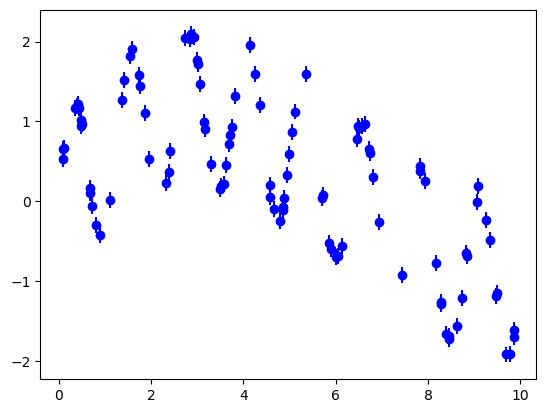

In [19]:
plt.errorbar(x, y, yerr=0.1, fmt='o', color='blue')


In [20]:
from sklearn.ensemble import RandomForestRegressor

xfit = np.linspace(0,10,1000)

In [21]:
rfr = RandomForestRegressor(100)

rfr.fit(x[:,None], y)

yfit = rfr.predict(xfit[:,None])

In [22]:
ytrue = sin_model(xfit,0)

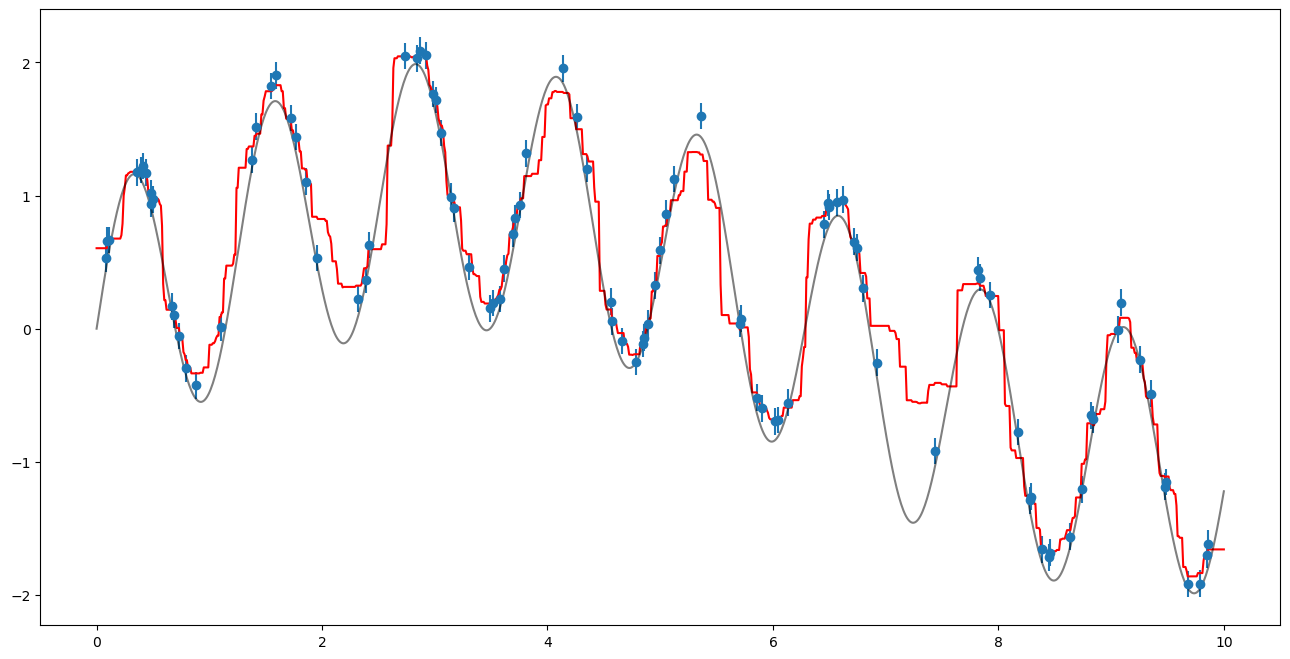

In [24]:
plt.figure(figsize=(16,8))

plt.errorbar(x,y,0.1,fmt='o')

plt.plot(xfit,yfit,'-r')

plt.plot(xfit,ytrue, '-k', alpha=0.5)